In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sagemaker import get_execution_role
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro 
from scipy.stats import lognorm
import statsmodels.api as sm 
import re

role = get_execution_role()
bucket='assignmentaveris'


### Analysis for questions 1 begins here

Data processing and cluster analysis will be done to answer the three subquestion of question 1 

In [2]:
data_key = 'ingredient.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

df1 = pd.read_csv(data_location)
df1.shape

(214, 9)

In [3]:
df1.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [4]:
df1.describe()
# since count of each variable is 214, there are no missing values in the dataset
# hence no missing value imputation will be done
# the scale of units of ingredients differ, hence data standardisation will be done 

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


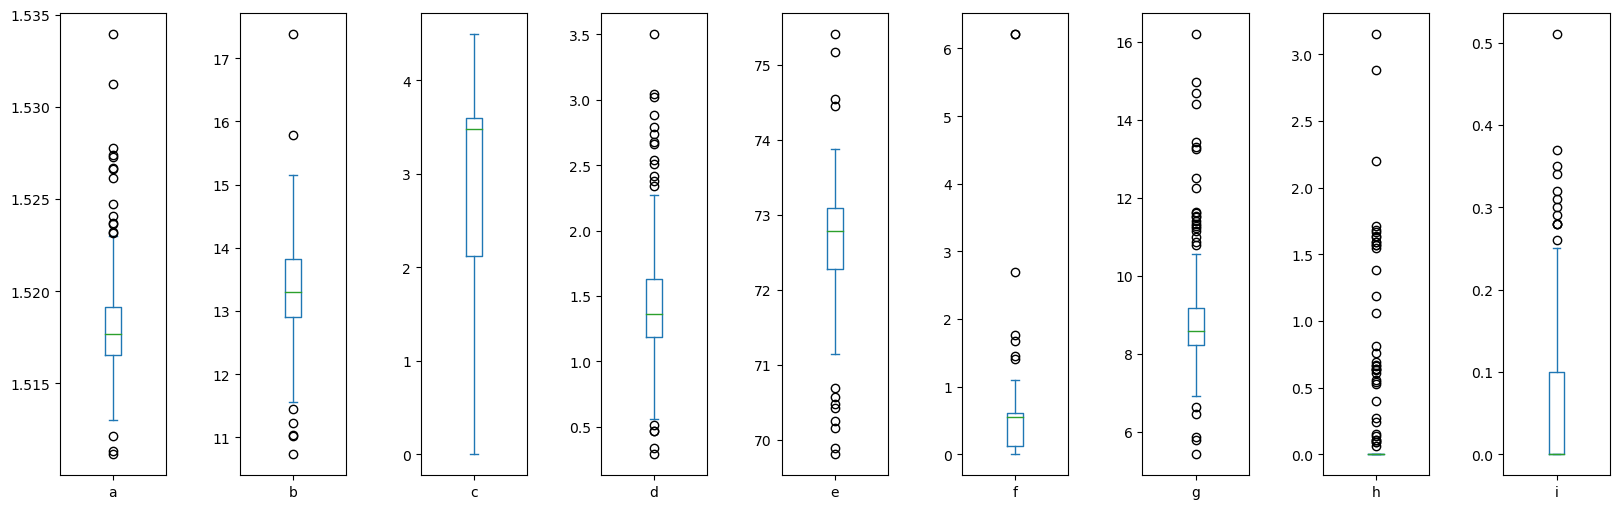

In [5]:
# we now look at the outliers. 
# The objective is to identify if there are potential outliers but no treatment will be done as
# outlier treatment needs a failry good understanding of the reason of their existance


df1.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.7) 
plt.show()

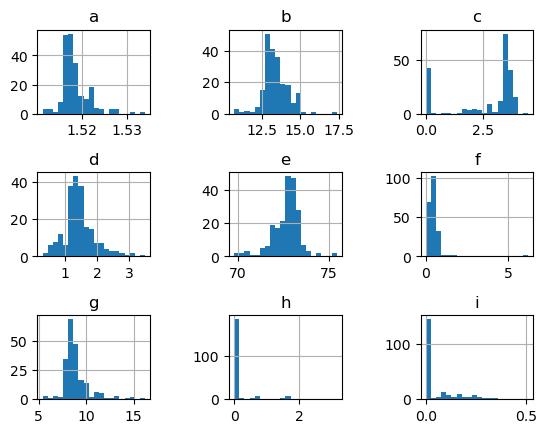

In [6]:
#checking for the spread in the data
df1.hist(column = ['a','b','c','d','e','f','g','h','i'], bins = 20)
# increase spacing between subplots
plt.subplots_adjust(wspace=0.7, hspace = 0.7) 
plt.show()

In [7]:
# creation of correlation matrix
corrM = df1.corr()
corrM.style.background_gradient(cmap='coolwarm')
#ingredients a and g are very highly correlated
#moderate correlation exists between c and d, c and g, c and h, d and h


,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [8]:
#to treat multicollinearity, PCA will be done
# data across the all the ingredients will be standardised first using standard scaler
# post standardisation, all the ingredients will have a mean of zero and std of 1

#drop rows with NA values in any columns
dfa = df1.drop_duplicates()
df = dfa.dropna()

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(df)

#view first five rows of scaled DataFrame
print(scaled_df[:5])

[[-0.32974224 -0.47141793  0.5976527   0.48612788  0.09703652  0.06311174
  -0.36138732 -0.35380764  0.13067999]
 [ 4.26402702 -3.28211985 -1.86017161  1.31481317 -3.68446925  0.1244944
   3.05505951  5.98327826  2.28762323]
 [ 1.5375093  -0.11547751  0.62542472 -1.27230189 -0.86129029 -0.58140614
   0.85475527 -0.35380764 -0.28016634]
 [-0.22068153 -1.03601308  0.58376668 -0.03937987  0.64095173  0.10914874
  -0.29109006 -0.35380764 -0.58830108]
 [-0.07196238  0.03180818  0.90314498 -0.54467578 -0.21377218  0.1244944
  -0.56524938 -0.35380764 -0.58830108]]


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit_transform(df)

array([[-9.85001068e-01, -2.66925113e-01,  2.57108425e-01, ...,
        -9.96193281e-03, -6.48502809e-02,  5.10730184e-06],
       [ 5.12169338e+00, -2.00391705e+00, -9.22105584e-01, ...,
         7.93251744e-02,  2.63200810e-02,  5.89594423e-04],
       [ 1.69066038e-01, -1.63989516e+00, -6.92714520e-01, ...,
        -5.85899026e-02, -5.70005545e-02, -5.22736604e-04],
       ...,
       [-9.40787604e-01, -6.90476504e-01,  7.12584995e-01, ...,
        -8.23726262e-02, -4.48932631e-02,  2.05295052e-04],
       [-8.07251131e-01, -9.58244957e-01, -8.92941883e-02, ...,
         1.50477292e-01,  2.22609118e-02,  9.16631445e-04],
       [ 1.74535297e-01,  3.10655213e+00,  1.44380690e-01, ...,
        -2.38347047e-02, -4.62935600e-02,  3.94119186e-04]])

In [10]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
prop_var
# first four PCs explain 93% of the variance
# we will confirm the same using scree plot in the next step

array([4.77586760e-01, 2.62999254e-01, 1.06620118e-01, 1.02126910e-01,
       3.30423787e-02, 1.59602445e-02, 1.42961575e-03, 2.34563554e-04,
       1.54397687e-07])

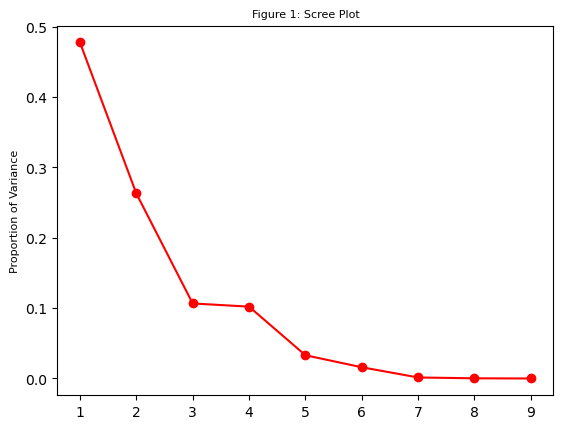

In [11]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()
#first for PCs are explaining almost 93% of the variance
# though the bend appears at 3, we will include 4 PCs to account for additional 10% variance

In [12]:
#The data will be transformed into 4 principal components
pca = PCA(n_components=4)
PC = pca.fit_transform(df)

In [13]:
#The transformed data will be converted into a dataframe
pca_df = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2','PC3','PC4'])
 
pca_df.head(6)

,PC1,PC2,PC3,PC4
0,-0.985001,-0.266925,0.257108,0.137439
1,5.121693,-2.003917,-0.922106,3.008213
2,0.169066,-1.639895,-0.692715,-0.271542
3,-0.928396,-0.486636,0.846187,0.069444
4,-1.517451,-0.332323,-0.210611,-0.061010
5,-0.971755,-0.319089,0.585142,-0.028762


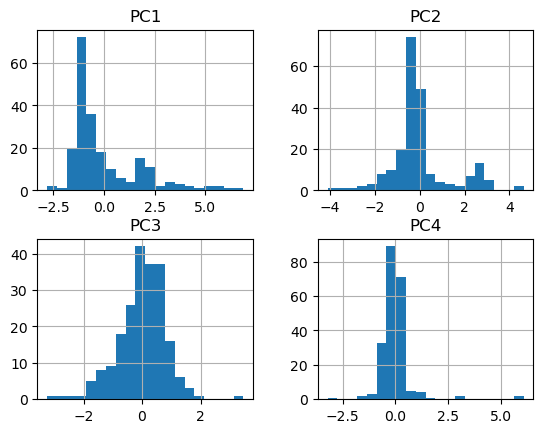

In [14]:
#Checking the distribution of the for principal components
pca_df.hist(column = ['PC1','PC2','PC3','PC4'], bins = 20)
plt.show() 

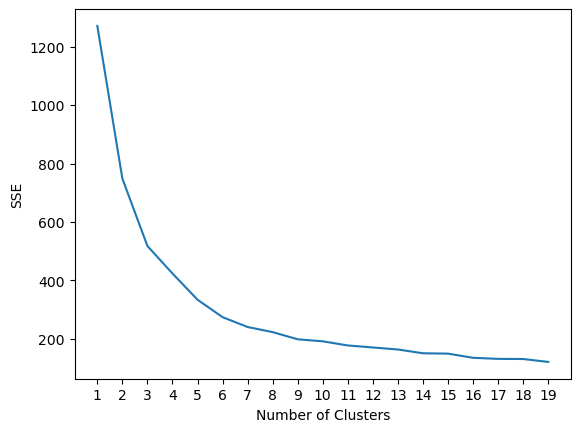

In [15]:
#Now we will run k-means to identify the number of clusters in the data
from sklearn.cluster import KMeans
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
#we can select anywhere between 6 and 8 clusters as that is where the elbow is
#we will go with the 8 cluster to begin with
#it is always a good practice to start with a higher number of clusters
#if needed, the number can be curtailed after discussion with the business stakeholders
# cluster number can also be decided by aic and bic scores

In [16]:
# we will first begin with the k-means
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=8, n_init=20, random_state=1)

#fit k-means algorithm to data
kmeans.fit(pca_df)
#append cluster assingments to original DataFrame
dfa['cluster'] = kmeans.labels_
#get the count of observations in each cluster
dfa.groupby('cluster')['a'].count().reset_index()
#K-means prefers even sized cluster which is not the case here
#Hence we will move to guassian mixture modelling

/tmp/ipykernel_9257/2363982529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster'] = kmeans.labels_


,cluster,a
0,0,16
1,1,14
2,2,7
3,3,2
4,4,25
5,5,116
6,6,6
7,7,27


In [17]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 8)
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(pca_df)
 
# Assign a label to each sample
labels = gmm.predict(pca_df)
dfa['labels']= labels
pca_df['labels']= labels
#get the count of observations in each cluster
dfa.groupby('labels')['a'].count().reset_index()
#The clusters below are more evenly spaced as compared to K-means

/tmp/ipykernel_9257/305628123.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['labels']= labels


,labels,a
0,0,40
1,1,16
2,2,22
3,3,11
4,4,3
5,5,98
6,6,2
7,7,21


In [18]:
pca_df_d0 = pca_df[pca_df['labels']== 0]
pca_df_d1 = pca_df[pca_df['labels']== 1]
pca_df_d2 = pca_df[pca_df['labels']== 2]
pca_df_d3 = pca_df[pca_df['labels']== 3]
pca_df_d4 = pca_df[pca_df['labels']== 4]
pca_df_d5 = pca_df[pca_df['labels']== 5]
pca_df_d6 = pca_df[pca_df['labels']== 6]
pca_df_d7 = pca_df[pca_df['labels']== 7]



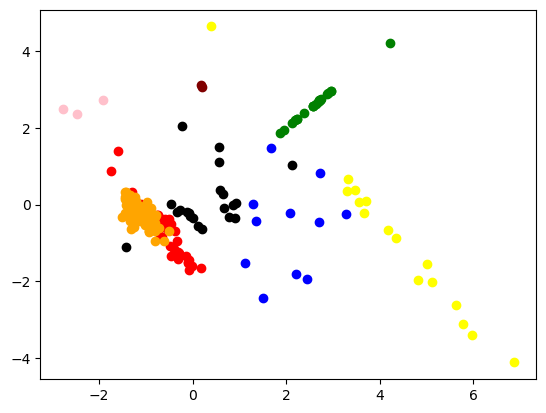

In [19]:
# plot three clusters in same plot
plt.scatter(pca_df_d0['PC1'], pca_df_d0['PC2'], c ='red')
plt.scatter(pca_df_d1['PC1'], pca_df_d1['PC2'], c ='yellow')
plt.scatter(pca_df_d2['PC2'], pca_df_d2['PC2'], c ='green')
plt.scatter(pca_df_d3['PC1'], pca_df_d3['PC2'], c ='blue')
plt.scatter(pca_df_d4['PC1'], pca_df_d4['PC2'], c ='pink')
plt.scatter(pca_df_d5['PC1'], pca_df_d5['PC2'], c ='orange')
plt.scatter(pca_df_d6['PC1'], pca_df_d6['PC2'], c ='maroon')
plt.scatter(pca_df_d7['PC1'], pca_df_d7['PC2'], c ='black')
plt.show()

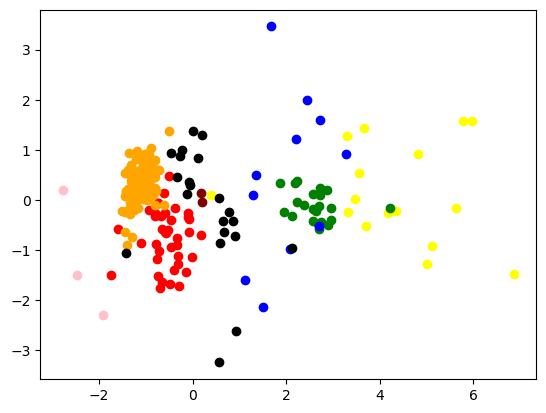

In [20]:
# plot three clusters in same plot
plt.scatter(pca_df_d0['PC1'], pca_df_d0['PC3'], c ='red')
plt.scatter(pca_df_d1['PC1'], pca_df_d1['PC3'], c ='yellow')
plt.scatter(pca_df_d2['PC2'], pca_df_d2['PC3'], c ='green')
plt.scatter(pca_df_d3['PC1'], pca_df_d3['PC3'], c ='blue')
plt.scatter(pca_df_d4['PC1'], pca_df_d4['PC3'], c ='pink')
plt.scatter(pca_df_d5['PC1'], pca_df_d5['PC3'], c ='orange')
plt.scatter(pca_df_d6['PC1'], pca_df_d6['PC3'], c ='maroon')
plt.scatter(pca_df_d7['PC1'], pca_df_d7['PC3'], c ='black')
plt.show()

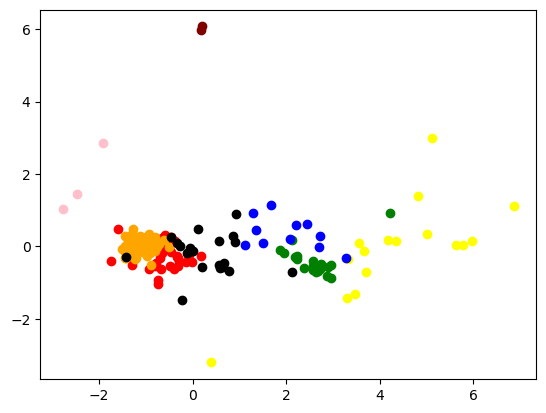

In [21]:
# plot three clusters in same plot
plt.scatter(pca_df_d0['PC1'], pca_df_d0['PC4'], c ='red')
plt.scatter(pca_df_d1['PC1'], pca_df_d1['PC4'], c ='yellow')
plt.scatter(pca_df_d2['PC2'], pca_df_d2['PC4'], c ='green')
plt.scatter(pca_df_d3['PC1'], pca_df_d3['PC4'], c ='blue')
plt.scatter(pca_df_d4['PC1'], pca_df_d4['PC4'], c ='pink')
plt.scatter(pca_df_d5['PC1'], pca_df_d5['PC4'], c ='orange')
plt.scatter(pca_df_d6['PC1'], pca_df_d6['PC4'], c ='maroon')
plt.scatter(pca_df_d7['PC1'], pca_df_d7['PC4'], c ='black')
plt.show()

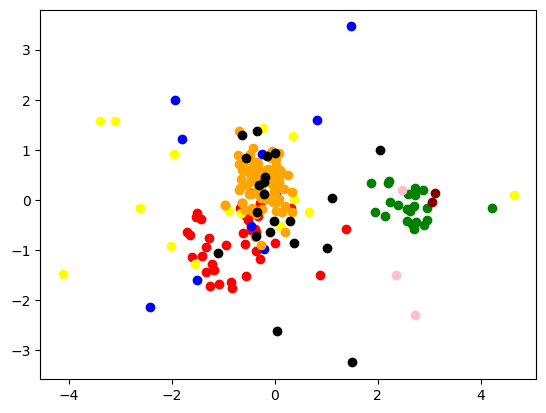

In [22]:
# plot three clusters in same plot
plt.scatter(pca_df_d0['PC2'], pca_df_d0['PC3'], c ='red')
plt.scatter(pca_df_d1['PC2'], pca_df_d1['PC3'], c ='yellow')
plt.scatter(pca_df_d2['PC2'], pca_df_d2['PC3'], c ='green')
plt.scatter(pca_df_d3['PC2'], pca_df_d3['PC3'], c ='blue')
plt.scatter(pca_df_d4['PC2'], pca_df_d4['PC3'], c ='pink')
plt.scatter(pca_df_d5['PC2'], pca_df_d5['PC3'], c ='orange')
plt.scatter(pca_df_d6['PC2'], pca_df_d6['PC3'], c ='maroon')
plt.scatter(pca_df_d7['PC2'], pca_df_d7['PC3'], c ='black')
plt.show()

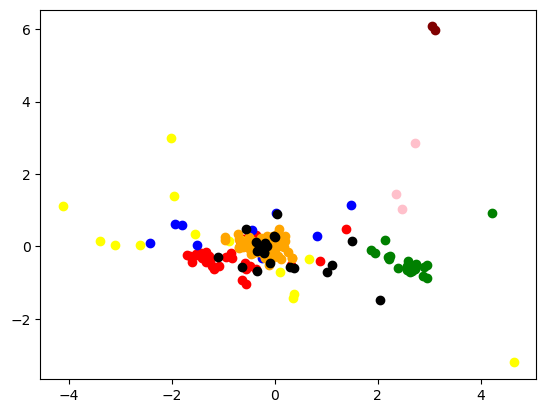

In [23]:
# plot three clusters in same plot
plt.scatter(pca_df_d0['PC2'], pca_df_d0['PC4'], c ='red')
plt.scatter(pca_df_d1['PC2'], pca_df_d1['PC4'], c ='yellow')
plt.scatter(pca_df_d2['PC2'], pca_df_d2['PC4'], c ='green')
plt.scatter(pca_df_d3['PC2'], pca_df_d3['PC4'], c ='blue')
plt.scatter(pca_df_d4['PC2'], pca_df_d4['PC4'], c ='pink')
plt.scatter(pca_df_d5['PC2'], pca_df_d5['PC4'], c ='orange')
plt.scatter(pca_df_d6['PC2'], pca_df_d6['PC4'], c ='maroon')
plt.scatter(pca_df_d7['PC2'], pca_df_d7['PC4'], c ='black')
plt.show()

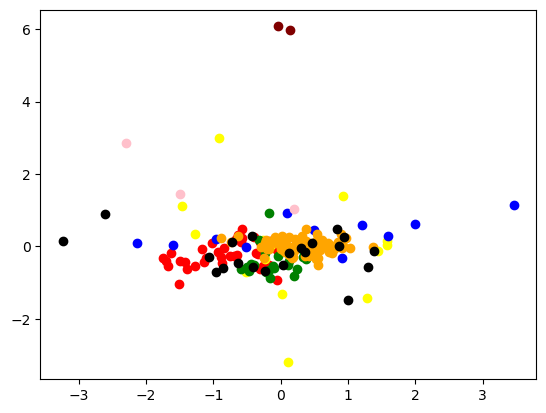

In [24]:
# plot three clusters in same plot
plt.scatter(pca_df_d0['PC3'], pca_df_d0['PC4'], c ='red')
plt.scatter(pca_df_d1['PC3'], pca_df_d1['PC4'], c ='yellow')
plt.scatter(pca_df_d2['PC3'], pca_df_d2['PC4'], c ='green')
plt.scatter(pca_df_d3['PC3'], pca_df_d3['PC4'], c ='blue')
plt.scatter(pca_df_d4['PC3'], pca_df_d4['PC4'], c ='pink')
plt.scatter(pca_df_d5['PC3'], pca_df_d5['PC4'], c ='orange')
plt.scatter(pca_df_d6['PC3'], pca_df_d6['PC4'], c ='maroon')
plt.scatter(pca_df_d7['PC3'], pca_df_d7['PC4'], c ='black')
plt.show()

In [25]:
dfa.groupby('cluster').mean().reset_index().to_csv('cluster_means.csv')

In [26]:
dfa.mean()

a           1.518348
b          13.404085
c           2.679202
d           1.449484
e          72.655070
f           0.498873
g           8.954085
h           0.175869
i           0.057277
cluster     4.408451
labels      3.539906
dtype: float64

In [27]:
dfa.groupby('labels').mean().reset_index().to_csv('cluster_means.csv')
dfa.mean().reset_index().to_csv('Overall_means.csv')

### Question 1 ends 

# 

### Analysis for Question 2 begins

In [28]:
data_key1 = 'palm_ffb.csv'
data_location1 = 's3://{}/{}'.format(bucket, data_key1)

palm_ffb_df = pd.read_csv(data_location1)
palm_ffb_df.shape

(130, 9)

In [29]:
palm_ffb_df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [30]:
palm_ffb_df.describe()
# since count of each variable is 130, there are no missing values in the dataset
# hence no missing value imputation will be done
# the scale of units of ingredients differ, hence data standardisation will be done 

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


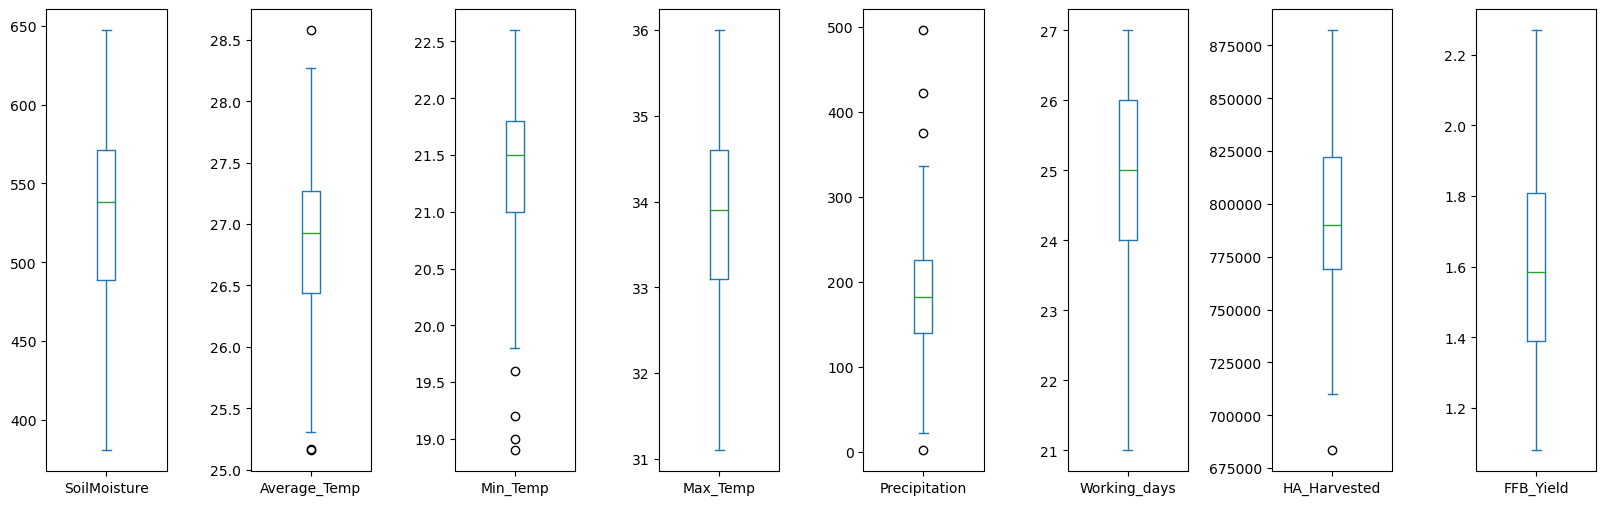

In [31]:
# we now look at the outliers. 
# The objective is to identify if there are potential outliers but no treatment will be done as
# outlier treatment needs a failry good understanding of the reason of their existance
palm_ffb_df.iloc[:,1:].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.7) 
plt.show()
#Minimum temperature has got the maximum outliers
#This could also be becase of the 11 years of data that is being analysed
#we will see the trend in each of the variables and decide if it is good to use the data
#for the entire timespan or not

In [32]:
#Before we take a look at the trend, we will have to create quarter, month and year variables
palm_ffb_df['Date_Revised'] = palm_ffb_df['Date'].str[3:5] + '.' + palm_ffb_df['Date'].str[0:2] + '.' + palm_ffb_df['Date'].str[6:]
palm_ffb_df['Date_Formatted'] = pd.to_datetime(palm_ffb_df['Date_Revised'])
palm_ffb_df['Month'] = pd.to_datetime(palm_ffb_df['Date_Formatted']).dt.month
palm_ffb_df['Quarter'] = pd.to_datetime(palm_ffb_df['Date_Formatted']).dt.quarter
palm_ffb_df['Year'] = pd.to_datetime(palm_ffb_df['Date_Formatted']).dt.year
palm_ffb_df['Year_Qt']= palm_ffb_df['Year'].astype(str) + "-" + palm_ffb_df['Quarter'].astype(str)
palm_ffb_df['Qt_Year']= palm_ffb_df['Quarter'].astype(str) + "-" + palm_ffb_df['Year'].astype(str)
palm_ffb_df['Month_Year']= palm_ffb_df['Month'].astype(str) + "-" + palm_ffb_df['Year'].astype(str)
#palm_ffb = palm_ffb.drop(columns = {'Date'})
palm_ffb_df.head()



,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Date_Revised,Date_Formatted,Month,Quarter,Year,Year_Qt,Qt_Year,Month_Year
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,01.01.2008,2008-01-01,1,1,2008,2008-1,1-2008,1-2008
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,02.01.2008,2008-02-01,2,1,2008,2008-1,1-2008,2-2008
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,03.01.2008,2008-03-01,3,1,2008,2008-1,1-2008,3-2008
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,04.01.2008,2008-04-01,4,2,2008,2008-2,2-2008,4-2008
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,05.01.2008,2008-05-01,5,2,2008,2008-2,2-2008,5-2008


In [33]:
#Now we will check if any of the month is missing
palm_ffb_df['Month_Year'].unique()
#for 2018, data is only available untill Oct-2018

array(['1-2008', '2-2008', '3-2008', '4-2008', '5-2008', '6-2008',
       '7-2008', '8-2008', '9-2008', '10-2008', '11-2008', '12-2008',
       '1-2009', '2-2009', '3-2009', '4-2009', '5-2009', '6-2009',
       '7-2009', '8-2009', '9-2009', '10-2009', '11-2009', '12-2009',
       '1-2010', '2-2010', '3-2010', '4-2010', '5-2010', '6-2010',
       '7-2010', '8-2010', '9-2010', '10-2010', '11-2010', '12-2010',
       '1-2011', '2-2011', '3-2011', '4-2011', '5-2011', '6-2011',
       '7-2011', '8-2011', '9-2011', '10-2011', '11-2011', '12-2011',
       '1-2012', '2-2012', '3-2012', '4-2012', '5-2012', '6-2012',
       '7-2012', '8-2012', '9-2012', '10-2012', '11-2012', '12-2012',
       '1-2013', '2-2013', '3-2013', '4-2013', '5-2013', '6-2013',
       '7-2013', '8-2013', '9-2013', '10-2013', '11-2013', '12-2013',
       '1-2014', '2-2014', '3-2014', '4-2014', '5-2014', '6-2014',
       '7-2014', '8-2014', '9-2014', '10-2014', '11-2014', '12-2014',
       '1-2015', '2-2015', '3-2015', '4-2

In [34]:
#by quarter and year, we will create the mean of the respective variables
palm_ffb_agg_qyy = palm_ffb_df.groupby('Year_Qt').agg(
    FFB_Yield=('FFB_Yield', np.mean),
    Average_Temp=('Average_Temp', np.mean),
    Max_Temp=('Max_Temp', np.mean),
    Min_Temp=('Min_Temp', np.mean),
    Precipitation =('Precipitation', np.mean),
    SoilMoisture=('SoilMoisture', np.mean),
    Working_days=('Working_days', np.mean),
    HA_Harvested=('HA_Harvested', np.mean)
).reset_index()
palm_ffb_agg_qyy.head()

,Year_Qt,FFB_Yield,Average_Temp,Max_Temp,Min_Temp,Precipitation,SoilMoisture,Working_days,HA_Harvested
0,2008-1,1.543333,25.640119,33.400000,21.166667,201.666667,587.633333,24.333333,776572.864700
1,2008-2,1.436667,27.087312,35.100000,20.966667,165.400000,553.000000,24.666667,810821.446733
2,2008-3,1.663333,27.264050,34.500000,21.366667,220.366667,562.100000,25.666667,797330.829233
3,2008-4,1.806667,26.551792,33.766667,21.866667,238.333333,583.133333,24.333333,763770.078067
4,2009-1,1.390000,26.368817,33.500000,21.666667,146.566667,517.833333,24.666667,773758.466000


In [35]:
#we will also create the Q-o-Q changes in all the variables
palm_ffb_agg_qyy['FFB_Yield_QoQ_Change'] = ((palm_ffb_agg_qyy['FFB_Yield'] - palm_ffb_agg_qyy['FFB_Yield'].shift(1))/ palm_ffb_agg_qyy['FFB_Yield']) * 100
palm_ffb_agg_qyy['Average_Temp_QoQ_Change'] = ((palm_ffb_agg_qyy['Average_Temp'] - palm_ffb_agg_qyy['Average_Temp'].shift(1))/ palm_ffb_agg_qyy['Average_Temp'] ) * 100
palm_ffb_agg_qyy['Max_Temp_QoQ_Change'] = ((palm_ffb_agg_qyy['Max_Temp'] - palm_ffb_agg_qyy['Max_Temp'].shift(1))/ palm_ffb_agg_qyy['Max_Temp'] ) * 100
palm_ffb_agg_qyy['Min_Temp_QoQ_Change'] = ((palm_ffb_agg_qyy['Min_Temp'] - palm_ffb_agg_qyy['Min_Temp'].shift(1))/ palm_ffb_agg_qyy['Min_Temp'] ) * 100
palm_ffb_agg_qyy['Precipitation_QoQ_Change'] = ((palm_ffb_agg_qyy['Precipitation'] - palm_ffb_agg_qyy['Precipitation'].shift(1))/ palm_ffb_agg_qyy['Precipitation']) * 100 
palm_ffb_agg_qyy['SoilMoisture_QoQ_Change'] = ((palm_ffb_agg_qyy['SoilMoisture'] - palm_ffb_agg_qyy['SoilMoisture'].shift(1))/ palm_ffb_agg_qyy['SoilMoisture'] ) * 100
palm_ffb_agg_qyy['Working_days_QoQ_Change'] = ((palm_ffb_agg_qyy['Working_days'] - palm_ffb_agg_qyy['Working_days'].shift(1))/ palm_ffb_agg_qyy['Working_days'] ) * 100
palm_ffb_agg_qyy['HA_Harvested_QoQ_Change'] = ((palm_ffb_agg_qyy['HA_Harvested'] - palm_ffb_agg_qyy['HA_Harvested'].shift(1))/ palm_ffb_agg_qyy['HA_Harvested'] ) * 100
palm_ffb_agg_qyy.head()

,Year_Qt,FFB_Yield,Average_Temp,Max_Temp,Min_Temp,Precipitation,SoilMoisture,Working_days,HA_Harvested,FFB_Yield_QoQ_Change,Average_Temp_QoQ_Change,Max_Temp_QoQ_Change,Min_Temp_QoQ_Change,Precipitation_QoQ_Change,SoilMoisture_QoQ_Change,Working_days_QoQ_Change,HA_Harvested_QoQ_Change
0,2008-1,1.543333,25.640119,33.400000,21.166667,201.666667,587.633333,24.333333,776572.864700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-2,1.436667,27.087312,35.100000,20.966667,165.400000,553.000000,24.666667,810821.446733,-7.424594,5.342698,4.843305,-0.953895,-21.926642,-6.262809,1.351351,4.223936
2,2008-3,1.663333,27.264050,34.500000,21.366667,220.366667,562.100000,25.666667,797330.829233,13.627255,0.648247,-1.739130,1.872075,24.943276,1.618929,3.896104,-1.691972
3,2008-4,1.806667,26.551792,33.766667,21.866667,238.333333,583.133333,24.333333,763770.078067,7.933579,-2.682524,-2.171767,2.286585,7.538462,3.606951,-5.479452,-4.394091
4,2009-1,1.390000,26.368817,33.500000,21.666667,146.566667,517.833333,24.666667,773758.466000,-29.976019,-0.693906,-0.796020,-0.923077,-62.610871,-12.610235,1.351351,1.290892


<Axes: xlabel='Year_Qt'>

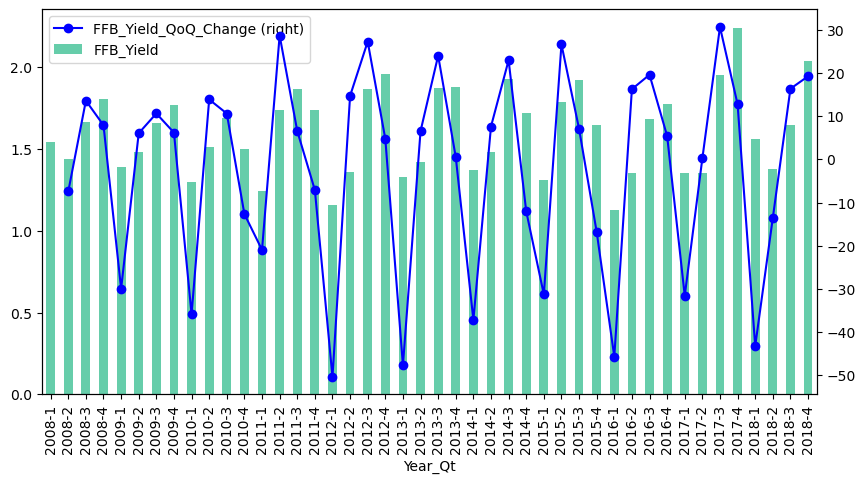

In [36]:
#Now we will start plotting the trend
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, facecolor='white')
palm_ffb_agg_qyy.plot(y='FFB_Yield_QoQ_Change', linestyle='-', marker='o',color = 'blue', ax=ax,secondary_y=True,figsize=(10, 5))
palm_ffb_agg_qyy.plot(x='Year_Qt', y='FFB_Yield', kind='bar',color = 'mediumaquamarine', ax=ax,figsize=(10, 5))
#As can be seen below, the variations in FFB_Yield have increased starting Jan 2011 
# and are consistent in the subsequent years
#We will see if a similar trend exists for other variables


<Axes: xlabel='Year_Qt'>

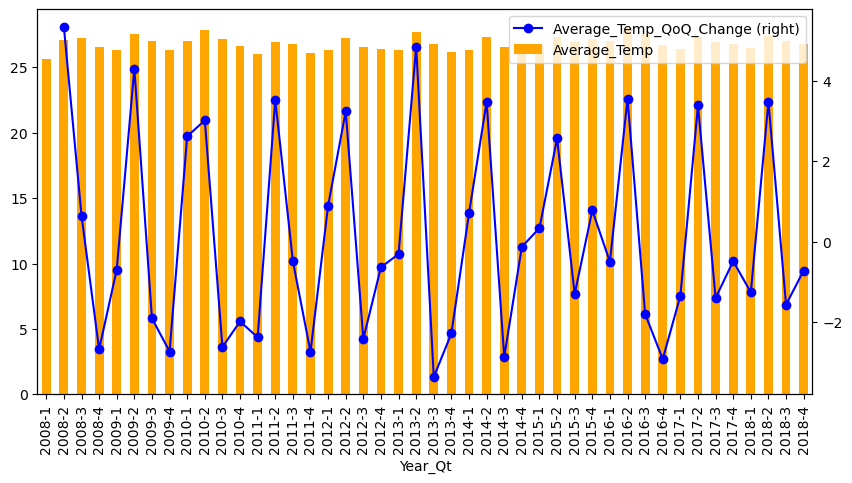

In [37]:
fig, ax = plt.subplots(1, facecolor='white')
palm_ffb_agg_qyy.plot(y='Average_Temp_QoQ_Change', linestyle='-', marker='o',color = 'blue', ax=ax,secondary_y=True,figsize=(10, 5))
palm_ffb_agg_qyy.plot(x='Year_Qt', y='Average_Temp', kind='bar',color = 'orange', ax=ax,figsize=(10, 5))
#starting 2016, variations in average temperature are lower as compared to the previous years


<Axes: xlabel='Year_Qt'>

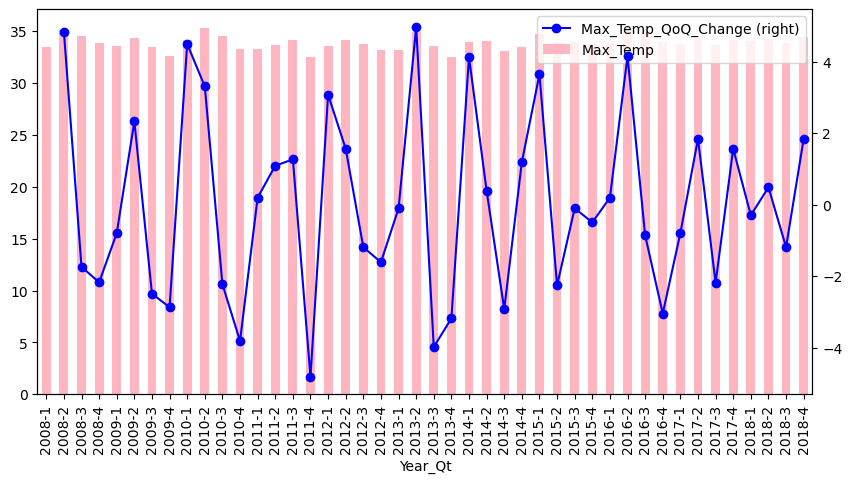

In [38]:
fig, ax = plt.subplots(1, facecolor='white')
palm_ffb_agg_qyy.plot(y='Max_Temp_QoQ_Change', linestyle='-', marker='o',color = 'blue', ax=ax,secondary_y=True,figsize=(10, 5))
palm_ffb_agg_qyy.plot(x='Year_Qt', y='Max_Temp', kind='bar',color = 'lightpink', ax=ax,figsize=(10, 5))
#starting 2016, Max temperature also has low variations as compared to the previous years




<Axes: xlabel='Year_Qt'>

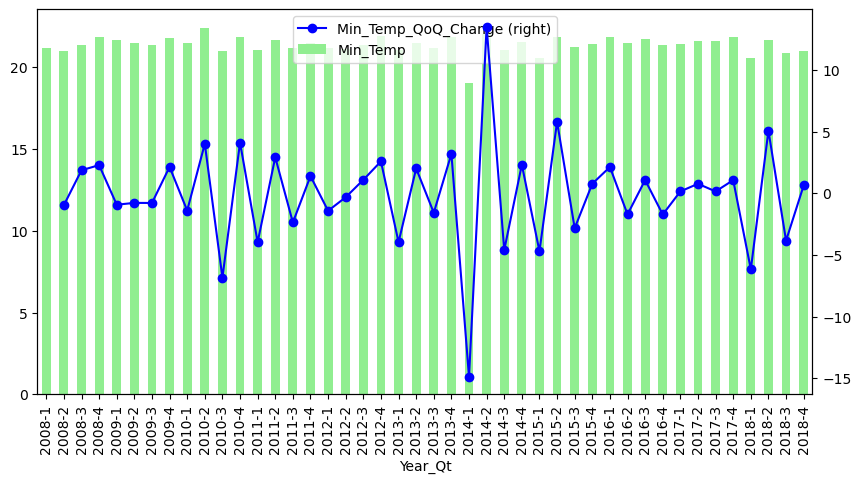

In [39]:
fig, ax = plt.subplots(1, facecolor='white')
palm_ffb_agg_qyy.plot(y='Min_Temp_QoQ_Change', linestyle='-', marker='o',color = 'blue', ax=ax,secondary_y=True,figsize=(10, 5))
palm_ffb_agg_qyy.plot(x='Year_Qt', y='Min_Temp', kind='bar',color = 'lightgreen', ax=ax,figsize=(10, 5))
# min temperature also has low variations for 2016 and 2017




<Axes: xlabel='Year_Qt'>

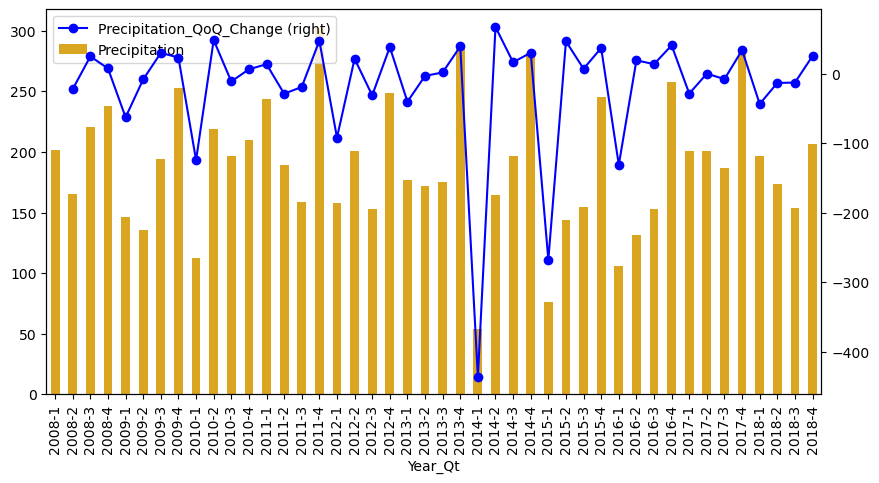

In [40]:
fig, ax = plt.subplots(1, facecolor='white')
palm_ffb_agg_qyy.plot(y='Precipitation_QoQ_Change', linestyle='-', marker='o',color = 'blue', ax=ax,secondary_y=True,figsize=(10, 5))
palm_ffb_agg_qyy.plot(x='Year_Qt', y='Precipitation', kind='bar',color = 'goldenrod', ax=ax,figsize=(10, 5))
#variations in precipitation appears to be same except for 15 months period starting Jan 2014




<Axes: xlabel='Year_Qt'>

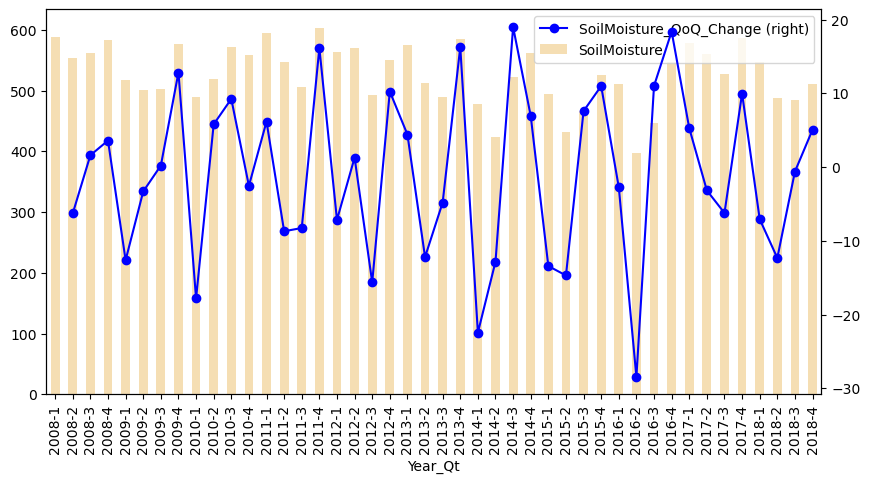

In [41]:
fig, ax = plt.subplots(1, facecolor='white')
palm_ffb_agg_qyy.plot(y='SoilMoisture_QoQ_Change', linestyle='-', marker='o',color = 'blue', ax=ax,secondary_y=True,figsize=(10,5))
palm_ffb_agg_qyy.plot(x='Year_Qt', y='SoilMoisture', kind='bar',color = 'wheat', ax=ax,figsize=(10, 5))
#Variations in soil moisture looks consistent for few months in 2014 and 2016





In [42]:
#Given the above results, it will make sense to run the analysis for two durations
# 1) starting 2011
# 2) starting 2016

### Model A begins

In [43]:
#Here we will run the analysis for the period starting 2011
### restructuring the coloumns so that subsetting will be easiser later
palm_ffb_df2 = palm_ffb_df.iloc[:,1:9]
palm_ffb1 = palm_ffb_df[['FFB_Yield','Precipitation','Average_Temp','Max_Temp','Min_Temp','SoilMoisture','Working_days','HA_Harvested']]

#since the lifecycle of a palm tree fruit is 5 months, we will create lag variables
#untill 5 months to check for any relationship with FFB_Yield
palm_ffb1['Precipitation_MinusOne'] = palm_ffb1['Precipitation'].shift(1)
palm_ffb1['Precipitation_MinusTwo'] = palm_ffb1['Precipitation'].shift(2)
palm_ffb1['Precipitation_MinusThree'] = palm_ffb1['Precipitation'].shift(3)
palm_ffb1['Precipitation_MinusFour'] = palm_ffb1['Precipitation'].shift(4)
palm_ffb1['Precipitation_MinusFive'] = palm_ffb1['Precipitation'].shift(5)
palm_ffb1['SoilMoisture_MinusOne'] = palm_ffb1['SoilMoisture'].shift(1)
palm_ffb1['SoilMoisture_MinusTwo'] = palm_ffb1['SoilMoisture'].shift(2)
palm_ffb1['SoilMoisture_MinusThree'] = palm_ffb1['SoilMoisture'].shift(3)
palm_ffb1['SoilMoisture_MinusFour'] = palm_ffb1['SoilMoisture'].shift(4)
palm_ffb1['SoilMoisture_MinusFive'] = palm_ffb1['SoilMoisture'].shift(5)
palm_ffb1['Average_Temp_MinusOne'] = palm_ffb1['Average_Temp'].shift(1)
palm_ffb1['Average_Temp_MinusTwo'] = palm_ffb1['Average_Temp'].shift(2)
palm_ffb1['Average_Temp_MinusThree'] = palm_ffb1['Average_Temp'].shift(3)
palm_ffb1['Average_Temp_MinusFour'] = palm_ffb1['Average_Temp'].shift(4)
palm_ffb1['Average_Temp_MinusFive'] = palm_ffb1['Average_Temp'].shift(5)
palm_ffb1['Min_Temp_MinusOne'] = palm_ffb1['Min_Temp'].shift(1)
palm_ffb1['Min_Temp_MinusTwo'] = palm_ffb1['Min_Temp'].shift(2)
palm_ffb1['Min_Temp_MinusThree'] = palm_ffb1['Min_Temp'].shift(3)
palm_ffb1['Min_Temp_MinusFour'] = palm_ffb1['Min_Temp'].shift(4)
palm_ffb1['Min_Temp_MinusFive'] = palm_ffb1['Min_Temp'].shift(5)
palm_ffb1['Max_Temp_MinusOne'] = palm_ffb1['Max_Temp'].shift(1)
palm_ffb1['Max_Temp_MinusTwo'] = palm_ffb1['Max_Temp'].shift(2)
palm_ffb1['Max_Temp_MinusThree'] = palm_ffb1['Max_Temp'].shift(3)
palm_ffb1['Max_Temp_MinusFour'] = palm_ffb1['Max_Temp'].shift(4)
palm_ffb1['Max_Temp_MinusFive'] = palm_ffb1['Max_Temp'].shift(5)

#Append the year column so that the respective year can be excluded
palm_ffb2 = pd.concat([palm_ffb1,palm_ffb_df['Year']],axis = 1)

#remove data for the period 2008,2009,2010
ommittedyears = [2008,2009,2010]
palm_ffb3 = palm_ffb2[~palm_ffb2['Year'].isin(ommittedyears)]

#drop duplicates and year colums
palm_ffb4 = palm_ffb3.drop_duplicates() #drop duplicate rows
palm_ffb5 = palm_ffb3.dropna() #drop rows with null values in any columns
palm_ffb5.drop(columns = {'Year'},inplace = True) # drop the year column

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_ffb = StandardScaler().fit_transform(palm_ffb5)

#view first five rows of scaled DataFrame
print(scaled_ffb[:5])

# # creation of correlation matrix
scaled_ffb1 = pd.DataFrame(scaled_ffb, columns = ['FFB_Yield', 'Precipitation', 'Average_Temp', 'Max_Temp', 'Min_Temp',
       'SoilMoisture', 'Working_days', 'HA_Harvested',
       'Precipitation_MinusOne', 'Precipitation_MinusTwo',
       'Precipitation_MinusThree', 'Precipitation_MinusFour',
       'Precipitation_MinusFive', 'SoilMoisture_MinusOne',
       'SoilMoisture_MinusTwo', 'SoilMoisture_MinusThree',
       'SoilMoisture_MinusFour', 'SoilMoisture_MinusFive',
       'Average_Temp_MinusOne', 'Average_Temp_MinusTwo',
       'Average_Temp_MinusThree', 'Average_Temp_MinusFour',
       'Average_Temp_MinusFive', 'Min_Temp_MinusOne', 'Min_Temp_MinusTwo',
       'Min_Temp_MinusThree', 'Min_Temp_MinusFour', 'Min_Temp_MinusFive',
       'Max_Temp_MinusOne', 'Max_Temp_MinusTwo', 'Max_Temp_MinusThree',
       'Max_Temp_MinusFour', 'Max_Temp_MinusFive'])

#drop any NAs, though there wont be any
scaled_ffb2 = scaled_ffb1.dropna().reset_index(drop=True)
scaled_ffb2.shape

#plot correlation
corrM = scaled_ffb2.corr()
corrM.style.background_gradient(cmap='coolwarm')



[[-1.74968787  3.56651482 -2.70631459 -2.24639996 -0.30653752  2.05388941
  -0.59677617  1.03526399  0.21226001  1.00576247 -0.48467212 -0.16657338
  -0.06954514  0.99735841  0.54929504  0.1726968   0.55749058  0.82529766
  -1.60472769 -0.09740887  0.73350472  0.65992528  0.469283    0.38069061
   1.32492422  0.4811711  -2.34567127  0.08767726 -1.98415246 -1.01068377
   1.33314865  0.47864378  1.65511049]
 [-1.58697452 -1.92363476 -1.00886603  0.76880478 -1.42014242  1.1981427
  -2.9341495   0.43295221  3.5666237   0.19935831  1.00477812 -0.48753604
  -0.16887427  2.03061391  0.98503647  0.54112127  0.16153897  0.54253999
  -2.65170005 -1.60188666 -0.1018273   0.72945813  0.66193658 -0.31551401
   0.35840522  1.31618802  0.48981868 -2.34428869 -2.17485832 -1.95977741
  -1.01711341  1.32401464  0.45193083]
 [-0.35035301  0.28053289 -0.33171724 -0.10657724  0.52866616  0.3521946
   1.74059716  0.24828588 -1.92359864  3.53556753  0.19717536  1.0029776
  -0.48996145  1.17931535  2.01910943

/tmp/ipykernel_9257/1003291601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palm_ffb1['Precipitation_MinusOne'] = palm_ffb1['Precipitation'].shift(1)
/tmp/ipykernel_9257/1003291601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palm_ffb1['Precipitation_MinusTwo'] = palm_ffb1['Precipitation'].shift(2)
/tmp/ipykernel_9257/1003291601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,FFB_Yield,Precipitation,Average_Temp,Max_Temp,Min_Temp,SoilMoisture,Working_days,HA_Harvested,Precipitation_MinusOne,Precipitation_MinusTwo,Precipitation_MinusThree,Precipitation_MinusFour,Precipitation_MinusFive,SoilMoisture_MinusOne,SoilMoisture_MinusTwo,SoilMoisture_MinusThree,SoilMoisture_MinusFour,SoilMoisture_MinusFive,Average_Temp_MinusOne,Average_Temp_MinusTwo,Average_Temp_MinusThree,Average_Temp_MinusFour,Average_Temp_MinusFive,Min_Temp_MinusOne,Min_Temp_MinusTwo,Min_Temp_MinusThree,Min_Temp_MinusFour,Min_Temp_MinusFive,Max_Temp_MinusOne,Max_Temp_MinusTwo,Max_Temp_MinusThree,Max_Temp_MinusFour,Max_Temp_MinusFive
FFB_Yield,1.000000,0.263612,-0.022480,-0.083876,0.125945,-0.034243,0.083577,-0.353134,-0.070919,-0.235987,-0.291147,-0.208407,-0.212029,-0.305012,-0.402685,-0.371385,-0.282614,-0.164549,0.266557,0.342648,0.336349,0.320969,0.258660,0.061936,-0.031506,0.018402,0.124163,0.063273,0.197135,0.276078,0.191047,0.203400,0.201719
Precipitation,0.263612,1.000000,-0.447478,-0.559933,0.359080,0.578633,0.102892,-0.259071,0.172287,0.001375,-0.186735,-0.100730,-0.024680,0.093716,-0.102859,-0.158839,-0.104442,-0.086573,0.038474,0.132127,0.065933,0.047676,0.164754,0.294377,0.009469,-0.148861,-0.129639,0.120636,-0.056100,0.197487,0.167207,-0.065515,0.102395
Average_Temp,-0.022480,-0.447478,1.000000,0.773327,0.207013,-0.707996,0.094954,0.391494,-0.486302,-0.413188,-0.197707,0.078041,0.246830,-0.586108,-0.334586,-0.028820,0.190951,0.230912,0.639986,0.226834,-0.048276,-0.168712,-0.166102,-0.069691,-0.101685,-0.092308,0.061868,0.122505,0.591241,0.247270,-0.008776,-0.146062,-0.178523
Max_Temp,-0.083876,-0.559933,0.773327,1.000000,-0.148762,-0.571799,-0.017650,0.268713,-0.362314,-0.136342,-0.005175,0.209832,0.156345,-0.291981,-0.046675,0.139151,0.199949,0.108154,0.268571,-0.028381,-0.076993,-0.096834,0.009826,-0.269336,-0.028808,0.027521,0.215667,0.157534,0.341944,-0.045846,-0.080580,-0.133070,-0.093665
Min_Temp,0.125945,0.359080,0.207013,-0.148762,1.000000,0.002565,0.057050,0.003363,-0.133228,-0.270476,-0.213202,-0.133490,0.097898,-0.291980,-0.301789,-0.169093,0.007793,0.133189,0.392851,0.280637,-0.034623,-0.024996,-0.042083,0.193607,-0.108098,-0.271897,-0.134981,-0.031546,0.293371,0.392502,0.032916,0.029742,0.033000
SoilMoisture,-0.034243,0.578633,-0.707996,-0.571799,0.002565,1.000000,-0.074983,-0.282452,0.721587,0.462038,0.171684,-0.015066,-0.068772,0.808984,0.440564,0.132846,-0.039552,-0.105745,-0.525276,-0.217775,-0.046300,0.024425,0.120357,0.278473,0.251795,0.083478,-0.074322,-0.036222,-0.538284,-0.239539,0.000957,0.033238,0.083524
Working_days,0.083577,0.102892,0.094954,-0.017650,0.057050,-0.074983,1.000000,0.053857,-0.198543,-0.077554,-0.013348,0.069609,0.100669,-0.107657,-0.030544,0.035907,0.066001,-0.029120,0.168201,0.009193,-0.060738,-0.127359,-0.061888,0.015986,-0.152332,-0.002381,0.059529,0.135193,0.240885,0.075737,-0.049074,-0.183819,-0.041751
HA_Harvested,-0.353134,-0.259071,0.391494,0.268713,0.003363,-0.282452,0.053857,1.000000,-0.258795,-0.050679,0.013882,0.184040,0.254661,-0.106267,0.100369,0.273040,0.436777,0.529013,0.219809,-0.059905,-0.199806,-0.363821,-0.434093,-0.011452,-0.016113,-0.093715,-0.185471,-0.161685,0.191743,0.027772,-0.049044,-0.096120,-0.173884
Precipitation_MinusOne,-0.070919,0.172287,-0.486302,-0.362314,-0.133228,0.721587,-0.198543,-0.258795,1.000000,0.173857,0.001947,-0.186311,-0.100278,0.578318,0.096615,-0.101045,-0.156387,-0.101281,-0.444832,0.037818,0.132779,0.066429,0.047362,0.361103,0.295995,0.013710,-0.149293,-0.130355,-0.554783,-0.059079,0.199025,0.168779,-0.060365
Precipitation_MinusTwo,-0.235987,0.001375,-0.413188,-0.136342,-0.270476,0.462038,-0.077554,-0.050679,0.173857,1.000000,0.167260,-0.000239,-0.186387,0.724573,0.580954,0.097536,-0.094865,-0.146595,-0.494315,-0.443363,0.045738,0.139359,0.071767,-0.128847,0.370045,0.300704,-0.012333,-0.147298,-0.374200,-0.559771,-0.043931,0.202706,0.183138


In [44]:
#check for normality
from scipy.stats import shapiro 
from scipy.stats import lognorm
#perform Shapiro-Wilk test for normality
columns =['FFB_Yield','Precipitation','Max_Temp','Min_Temp','Average_Temp','SoilMoisture']
for i in columns:
    print(i,"is" , shapiro(palm_ffb5[i]))
    
#run the regression after dropping the 'Working_days','HA_Harvested' columns
scaled_ffb2.drop(columns = {'Working_days','HA_Harvested','Max_Temp','SoilMoisture','Max_Temp_MinusOne', 'Max_Temp_MinusTwo', 'Max_Temp_MinusThree',
                            'Max_Temp_MinusFour', 'Max_Temp_MinusFive',
                           'SoilMoisture_MinusOne','SoilMoisture_MinusTwo', 'SoilMoisture_MinusThree',
                            'SoilMoisture_MinusFour', 'SoilMoisture_MinusFive','SoilMoisture'}, inplace = True)    
import statsmodels.api as sm 
#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','SoilMoisture','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','SoilMoisture_MinusTwo','SoilMoisture_MinusThree']])
#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','Max_Temp_MinusThree','Max_Temp_MinusFour']])
Xb = sm.add_constant(scaled_ffb2.iloc[:,1:])
y_true = scaled_ffb2['FFB_Yield']
mod = sm.OLS(y_true, Xb)
res = mod.fit()
res.summary()
#The regression output shows none of the variables are significant
#This could be because of the changes in variables that are observed after 2016




FFB_Yield is ShapiroResult(statistic=0.9687376022338867, pvalue=0.023712515830993652)
Precipitation is ShapiroResult(statistic=0.9752002954483032, pvalue=0.07071514427661896)
Max_Temp is ShapiroResult(statistic=0.9885609745979309, pvalue=0.5949389338493347)
Min_Temp is ShapiroResult(statistic=0.9289766550064087, pvalue=7.332267705351114e-05)
Average_Temp is ShapiroResult(statistic=0.9924761056900024, pvalue=0.8782935738563538)
SoilMoisture is ShapiroResult(statistic=0.9845002293586731, pvalue=0.33309826254844666)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     2.377
Date:                Sun, 25 Jun 2023   Prob (F-statistic):            0.00486
Time:                        09:49:33   Log-Likelihood:                -112.17
No. Observations:                  94   AIC:                             262.3
Df Residuals:                      75   BIC:                             310.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     9.021e-16      0.092   9.79e-15      1.000      -0.184       0.184
Precipitation                0.1707      0.146      1.168      0.247      -0.120       0.462
Average_Temp                -0.1708      0.184     -0.926      0.357      -0.538       0.197
Min_Temp                    -0.0371      0.122     -0.304      0.762      -0.280       0.206
Precipitation_MinusOne      -0.0424      0.136     -0.313      0.755      -0.312       0.228
Precipitation_MinusTwo      -0.2443      0.141     -1.735      0.087      -0.525       0.036
Precipitation_MinusThree    -0.2861      0.141     -2.027      0.046      -0.567      -0.005
Precipitation_MinusFour     -0.1237      0.139     -0.887      0.378      -0.402       0.154
Precipitation_MinusFive     -0.0962      0.133     -0.723      0.472      -0.361       0.169
Average_Temp_MinusOne        0.1794      0.207      0.868      0.388      -0.232       0.591
Average_Temp_MinusTwo       -0.0525      0.210     -0.250      0.803      -0.471       0.366
Average_Temp_MinusThree      0.0480      0.216      0.223      0.824      -0.382       0.477
Average_Temp_MinusFour       0.1481      0.216      0.686      0.495      -0.282       0.578
Average_Temp_MinusFive       0.0546      0.169      0.324      0.747      -0.281       0.390
Min_Temp_MinusOne           -0.0841      0.123     -0.682      0.497      -0.329       0.161
Min_Temp_MinusTwo           -0.0381      0.124     -0.307      0.760      -0.285       0.209
Min_Temp_MinusThree          0.0503      0.122      0.412      0.681      -0.193       0.293
Min_Temp_MinusFour           0.1745      0.119      1.461      0.148      -0.063       0.412
Min_Temp_MinusFive           0.0433      0.120      0.362      0.719      -0.195       0.282
==============================================================================
Omnibus:                        0.008   Durbin-Watson:                   0.456
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.082
Skew:                          -0.021   Prob(JB):                        0.960
Kurtosis:                       2.861   Cond. No.                         6.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Now we will run the regression again by sequentially dropping the columns with max p value
#the steps will be repeated untill there are no attributes with > 0.05 p value
#drop any NAs, though there wont be any
scaled_ffb2 = scaled_ffb1.dropna().reset_index(drop=True)
scaled_ffb2.shape
scaled_ffb2.drop(columns = {'Working_days','HA_Harvested','Max_Temp','SoilMoisture','Max_Temp_MinusOne', 'Max_Temp_MinusTwo', 'Max_Temp_MinusThree',
                            'Max_Temp_MinusFour', 'Max_Temp_MinusFive',
                           'SoilMoisture_MinusOne','SoilMoisture_MinusTwo', 'SoilMoisture_MinusThree',
                            'SoilMoisture_MinusFour', 'SoilMoisture_MinusFive','SoilMoisture','Min_Temp_MinusTwo','Min_Temp','Precipitation_MinusOne',
                            'Average_Temp_MinusThree','Average_Temp_MinusTwo','Average_Temp_MinusFive','Min_Temp_MinusThree','Min_Temp_MinusFive',
                            'Precipitation_MinusFour','Precipitation_MinusFive','Min_Temp_MinusOne','Precipitation','Min_Temp_MinusFour','Average_Temp_MinusOne',
                            'Average_Temp'
                           }, inplace = True)    




In [46]:
import statsmodels.api as sm 
#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','SoilMoisture','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','SoilMoisture_MinusTwo','SoilMoisture_MinusThree']])
#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','Max_Temp_MinusThree','Max_Temp_MinusFour']])
Xb = sm.add_constant(scaled_ffb2.iloc[:,1:])
y_true = scaled_ffb2['FFB_Yield']
mod = sm.OLS(y_true, Xb)
res = mod.fit()
res.summary()
# The summary below contains all the variables that significantly affect FFB_Yield

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     10.15
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           8.00e-06
Time:                        09:49:33   Log-Likelihood:                -119.69
No. Observations:                  94   AIC:                             247.4
Df Residuals:                      90   BIC:                             257.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.596e-15      0.091   1.75e-14      1.000      -0.181       0.181
Precipitation_MinusTwo      -0.2424      0.093     -2.599      0.011      -0.428      -0.057
Precipitation_MinusThree    -0.2672      0.092     -2.890      0.005      -0.451      -0.084
Average_Temp_MinusFour       0.3669      0.092      3.986      0.000       0.184       0.550
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   0.466
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.116
Skew:                          -0.017   Prob(JB):                        0.572
Kurtosis:                       2.467   Cond. No.                         1.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model A ends

### Model B begins

In [47]:
#Here we will run the analysis for the period starting 2016
### restructuring the coloumns so that subsetting will be easiser later
palm_ffb_df2 = palm_ffb_df.iloc[:,1:9]
palm_ffb1 = palm_ffb_df[['FFB_Yield','Precipitation','Average_Temp','Max_Temp','Min_Temp','SoilMoisture','Working_days','HA_Harvested']]

#since the lifecycle of a palm tree fruit is 5 months, we will create lag variables
#untill 5 months to check for any relationship with FFB_Yield
palm_ffb1['Precipitation_MinusOne'] = palm_ffb1['Precipitation'].shift(1)
palm_ffb1['Precipitation_MinusTwo'] = palm_ffb1['Precipitation'].shift(2)
palm_ffb1['Precipitation_MinusThree'] = palm_ffb1['Precipitation'].shift(3)
palm_ffb1['Precipitation_MinusFour'] = palm_ffb1['Precipitation'].shift(4)
palm_ffb1['Precipitation_MinusFive'] = palm_ffb1['Precipitation'].shift(5)
palm_ffb1['SoilMoisture_MinusOne'] = palm_ffb1['SoilMoisture'].shift(1)
palm_ffb1['SoilMoisture_MinusTwo'] = palm_ffb1['SoilMoisture'].shift(2)
palm_ffb1['SoilMoisture_MinusThree'] = palm_ffb1['SoilMoisture'].shift(3)
palm_ffb1['SoilMoisture_MinusFour'] = palm_ffb1['SoilMoisture'].shift(4)
palm_ffb1['SoilMoisture_MinusFive'] = palm_ffb1['SoilMoisture'].shift(5)
palm_ffb1['Average_Temp_MinusOne'] = palm_ffb1['Average_Temp'].shift(1)
palm_ffb1['Average_Temp_MinusTwo'] = palm_ffb1['Average_Temp'].shift(2)
palm_ffb1['Average_Temp_MinusThree'] = palm_ffb1['Average_Temp'].shift(3)
palm_ffb1['Average_Temp_MinusFour'] = palm_ffb1['Average_Temp'].shift(4)
palm_ffb1['Average_Temp_MinusFive'] = palm_ffb1['Average_Temp'].shift(5)
palm_ffb1['Min_Temp_MinusOne'] = palm_ffb1['Min_Temp'].shift(1)
palm_ffb1['Min_Temp_MinusTwo'] = palm_ffb1['Min_Temp'].shift(2)
palm_ffb1['Min_Temp_MinusThree'] = palm_ffb1['Min_Temp'].shift(3)
palm_ffb1['Min_Temp_MinusFour'] = palm_ffb1['Min_Temp'].shift(4)
palm_ffb1['Min_Temp_MinusFive'] = palm_ffb1['Min_Temp'].shift(5)
palm_ffb1['Max_Temp_MinusOne'] = palm_ffb1['Max_Temp'].shift(1)
palm_ffb1['Max_Temp_MinusTwo'] = palm_ffb1['Max_Temp'].shift(2)
palm_ffb1['Max_Temp_MinusThree'] = palm_ffb1['Max_Temp'].shift(3)
palm_ffb1['Max_Temp_MinusFour'] = palm_ffb1['Max_Temp'].shift(4)
palm_ffb1['Max_Temp_MinusFive'] = palm_ffb1['Max_Temp'].shift(5)

#Append the year column so that the respective year can be excluded
palm_ffb2 = pd.concat([palm_ffb1,palm_ffb_df['Year']],axis = 1)

#remove data for the period 2008,2009,2010
ommittedyears = [2008,2009,2010,2011,2012,2013,2014,2015]
palm_ffb3 = palm_ffb2[~palm_ffb2['Year'].isin(ommittedyears)]

#drop duplicates and year colums
palm_ffb4 = palm_ffb3.drop_duplicates() #drop duplicate rows
palm_ffb5 = palm_ffb3.dropna() #drop rows with null values in any columns
palm_ffb5.drop(columns = {'Year'},inplace = True) # drop the year column

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_ffb = StandardScaler().fit_transform(palm_ffb5)

#view first five rows of scaled DataFrame
print(scaled_ffb[:5])

# # creation of correlation matrix
scaled_ffb1 = pd.DataFrame(scaled_ffb, columns = ['FFB_Yield', 'Precipitation', 'Average_Temp', 'Max_Temp', 'Min_Temp',
       'SoilMoisture', 'Working_days', 'HA_Harvested',
       'Precipitation_MinusOne', 'Precipitation_MinusTwo',
       'Precipitation_MinusThree', 'Precipitation_MinusFour',
       'Precipitation_MinusFive', 'SoilMoisture_MinusOne',
       'SoilMoisture_MinusTwo', 'SoilMoisture_MinusThree',
       'SoilMoisture_MinusFour', 'SoilMoisture_MinusFive',
       'Average_Temp_MinusOne', 'Average_Temp_MinusTwo',
       'Average_Temp_MinusThree', 'Average_Temp_MinusFour',
       'Average_Temp_MinusFive', 'Min_Temp_MinusOne', 'Min_Temp_MinusTwo',
       'Min_Temp_MinusThree', 'Min_Temp_MinusFour', 'Min_Temp_MinusFive',
       'Max_Temp_MinusOne', 'Max_Temp_MinusTwo', 'Max_Temp_MinusThree',
       'Max_Temp_MinusFour', 'Max_Temp_MinusFive'])

#drop any NAs, though there wont be any
scaled_ffb2 = scaled_ffb1.dropna().reset_index(drop=True)
scaled_ffb2.shape

#check for normality

#perform Shapiro-Wilk test for normality
columns =['FFB_Yield','Precipitation','Max_Temp','Min_Temp','Average_Temp','SoilMoisture']
for i in columns:
    print(i,"is" , shapiro(palm_ffb5[i]))
    
#run the regression after dropping the 'Working_days','HA_Harvested' columns
scaled_ffb2.drop(columns = {'Working_days','HA_Harvested','Max_Temp','SoilMoisture','Max_Temp_MinusOne', 'Max_Temp_MinusTwo', 'Max_Temp_MinusThree',
                            'Max_Temp_MinusFour', 'Max_Temp_MinusFive',
                           'SoilMoisture_MinusOne','SoilMoisture_MinusTwo', 'SoilMoisture_MinusThree',
                            'SoilMoisture_MinusFour', 'SoilMoisture_MinusFive','SoilMoisture'}, inplace = True)    

#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','SoilMoisture','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','SoilMoisture_MinusTwo','SoilMoisture_MinusThree']])
#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','Max_Temp_MinusThree','Max_Temp_MinusFour']])
Xb = sm.add_constant(scaled_ffb2.iloc[:,1:])
y_true = scaled_ffb2['FFB_Yield']
mod = sm.OLS(y_true, Xb)
res = mod.fit()
res.summary()


[[-1.52351453e+00 -1.05205891e+00 -4.87455306e-01 -9.68597386e-01
   1.19137453e+00  6.18803170e-01  9.47173327e-01 -1.63136790e+00
   1.11559447e+00  1.08045996e+00 -8.51074914e-02 -1.39438461e+00
   7.98739861e-01  1.02627455e+00  1.17713621e-01 -8.47012023e-01
  -6.19642422e-01 -5.93229444e-01 -5.25442259e-01 -4.33617754e-02
   1.05743454e+00  6.66192767e-02 -5.73530934e-01  6.80850276e-01
   1.36920269e+00 -2.33066278e+00 -1.38362652e+00  3.22503365e-01
  -1.11081316e+00 -1.05713947e+00  1.05406488e+00  1.08602914e+00
  -7.32676387e-01]
 [-1.49286395e+00 -1.42327560e-01 -1.02707708e+00 -1.88906571e+00
   7.22184560e-01  5.12465386e-02 -1.29960991e+00 -1.01231203e+00
  -1.05892233e+00  1.06008028e+00  1.06900913e+00 -5.51593097e-02
  -1.41662400e+00  5.75250109e-01  1.00983362e+00  1.22823455e-01
  -8.37305558e-01 -6.09413189e-01 -4.82847151e-01 -5.30078791e-01
  -7.69700748e-02  1.05486240e+00  8.99637977e-02  1.15008493e+00
   6.03530132e-01  1.33119187e+00 -2.23895927e+00 -1.3863

/tmp/ipykernel_9257/1262253380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palm_ffb1['Precipitation_MinusOne'] = palm_ffb1['Precipitation'].shift(1)
/tmp/ipykernel_9257/1262253380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palm_ffb1['Precipitation_MinusTwo'] = palm_ffb1['Precipitation'].shift(2)
/tmp/ipykernel_9257/1262253380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     1.642
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.168
Time:                        09:49:33   Log-Likelihood:                -29.733
No. Observations:                  34   AIC:                             97.47
Df Residuals:                      15   BIC:                             126.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -7.716e-15      0.150  -5.15e-14      1.000      -0.319       0.319
Precipitation                0.8743      0.265      3.304      0.005       0.310       1.438
Average_Temp                 0.6337      0.417      1.519      0.150      -0.256       1.523
Min_Temp                    -0.1451      0.179     -0.809      0.431      -0.527       0.237
Precipitation_MinusOne       0.1513      0.273      0.554      0.588      -0.431       0.733
Precipitation_MinusTwo       0.2335      0.325      0.718      0.484      -0.460       0.927
Precipitation_MinusThree    -0.1049      0.312     -0.336      0.741      -0.770       0.560
Precipitation_MinusFour      0.1830      0.313      0.584      0.568      -0.485       0.851
Precipitation_MinusFive     -0.1127      0.289     -0.389      0.703      -0.729       0.504
Average_Temp_MinusOne       -0.0866      0.392     -0.221      0.828      -0.923       0.750
Average_Temp_MinusTwo        0.4304      0.416      1.035      0.317      -0.456       1.317
Average_Temp_MinusThree     -0.0161      0.395     -0.041      0.968      -0.857       0.825
Average_Temp_MinusFour       0.3115      0.383      0.813      0.429      -0.505       1.128
Average_Temp_MinusFive       0.0305      0.287      0.106      0.917      -0.582       0.643
Min_Temp_MinusOne           -0.4659      0.187     -2.495      0.025      -0.864      -0.068
Min_Temp_MinusTwo           -0.3011      0.211     -1.429      0.174      -0.750       0.148
Min_Temp_MinusThree         -0.1827      0.225     -0.812      0.430      -0.662       0.297
Min_Temp_MinusFour           0.0647      0.193      0.335      0.742      -0.348       0.477
Min_Temp_MinusFive          -0.1229      0.205     -0.600      0.557      -0.559       0.314
==============================================================================
Omnibus:                        4.032   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.039
Skew:                           0.727   Prob(JB):                        0.219
Kurtosis:                       3.171   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Now we will run the regression again by sequentially dropping the columns with max p value
#the steps will be repeated untill there are no attributes with > 0.05 p value
#drop any NAs, though there wont be any
scaled_ffb2 = scaled_ffb1.dropna().reset_index(drop=True)
scaled_ffb2.shape
scaled_ffb2.drop(columns = {'Working_days','HA_Harvested','Max_Temp','SoilMoisture','Max_Temp_MinusOne', 'Max_Temp_MinusTwo', 'Max_Temp_MinusThree',
                            'Max_Temp_MinusFour', 'Max_Temp_MinusFive',
                           'SoilMoisture_MinusOne','SoilMoisture_MinusTwo', 'SoilMoisture_MinusThree',
                            'SoilMoisture_MinusFour', 'SoilMoisture_MinusFive','SoilMoisture','Average_Temp_MinusThree',
                           'Average_Temp_MinusFive','Average_Temp_MinusOne','Precipitation_MinusFive','Precipitation_MinusThree',
                           'Min_Temp_MinusFour','Min_Temp_MinusFive','Min_Temp_MinusThree','Precipitation_MinusTwo','Precipitation_MinusFour',
                           'Precipitation_MinusOne','Min_Temp','Min_Temp_MinusTwo','Average_Temp_MinusTwo','Average_Temp','Average_Temp_MinusFour'}, inplace = True)    




In [49]:
import statsmodels.api as sm 
#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','SoilMoisture','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','SoilMoisture_MinusTwo','SoilMoisture_MinusThree']])
#Xb = sm.add_constant(scaled_ffb3[['Precipitation','Precipitation_MinusOne','Max_Temp','Max_Temp_MinusOne','Max_Temp_MinusTwo','Max_Temp_MinusThree','Max_Temp_MinusFour']])
Xb = sm.add_constant(scaled_ffb2.iloc[:,1:])
y_true = scaled_ffb2['FFB_Yield']
mod = sm.OLS(y_true, Xb)
res = mod.fit()
res.summary()
# The summary below contains all the variables that significantly affect FFB_Yield

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     10.33
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           0.000364
Time:                        09:49:33   Log-Likelihood:                -39.560
No. Observations:                  34   AIC:                             85.12
Df Residuals:                      31   BIC:                             89.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.886e-16      0.139   2.79e-15      1.000      -0.284       0.284
Precipitation         0.6388      0.145      4.411      0.000       0.343       0.934
Min_Temp_MinusOne    -0.3309      0.145     -2.285      0.029      -0.626      -0.036
==============================================================================
Omnibus:                        1.979   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.527
Skew:                           0.335   Prob(JB):                        0.466
Kurtosis:                       2.207   Cond. No.                         1.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model B ends

In [50]:
#In the next step, we will create a dataframe consisting of significant variables, there coefficient and p value
coeff_df = pd.DataFrame(res.params).reset_index()
coeff_df.rename(columns ={'index':'Attributes',0:'Coeff'}, inplace= True)
pval_df = pd.DataFrame(res.pvalues).reset_index()
pval_df.rename(columns ={'index':'Attributes',0:'pvalue'}, inplace= True)
coeff_df_all = coeff_df
coeff_df_all = coeff_df_all.reset_index(drop=True)
pval_df_all = pval_df
pval_df_all = pval_df_all.reset_index(drop=True)
coef_pval_df = coeff_df_all.merge(pval_df_all, left_on = 'Attributes', right_on = 'Attributes', how = 'left')
sig_coeff_df = coef_pval_df[coef_pval_df['pvalue'] < 0.05]
sig_coeff_df
#The coefficients are currently in the units of respective standard deviation
#for example, one standard deviation change in precipitation will increase FFB_Yield by 0.69 standard deviation
#this is difficult to explain 
#Hence in the next step, we will conver this relationship in the respective unit of the variables

,Attributes,Coeff,pvalue
1,Precipitation,0.638823,0.000115
2,Min_Temp_MinusOne,-0.330919,0.029331


In [51]:
# we will need to form a data frame containing the standard deviation of the significant variables
palm_ffb_df['Precipitation_MinusOne'] = palm_ffb_df['Precipitation'].shift(1)
palm_ffb_df['SoilMoisture_MinusOne'] = palm_ffb_df['SoilMoisture'].shift(1)
palm_ffb_df['SoilMoisture_MinusTwo'] = palm_ffb_df['SoilMoisture'].shift(2)
palm_ffb_df['SoilMoisture_MinusThree'] = palm_ffb_df['SoilMoisture'].shift(3)
palm_ffb_df['Average_Temp_MinusTwo'] = palm_ffb_df['Average_Temp'].shift(2)
palm_ffb_df['Average_Temp_MinusThree'] = palm_ffb_df['Average_Temp'].shift(3)
palm_ffb_df['Average_Temp_MinusFour'] = palm_ffb_df['Average_Temp'].shift(4)
palm_ffb_df['Average_Temp_MinusFive'] = palm_ffb_df['Average_Temp'].shift(5)
palm_ffb_df['Min_Temp_MinusOne'] = palm_ffb_df['Min_Temp'].shift(1)
palm_ffb_df['Min_Temp_MinusTwo'] = palm_ffb_df['Min_Temp'].shift(2)
palm_ffb_df['Min_Temp_MinusThree'] = palm_ffb_df['Min_Temp'].shift(3)
palm_ffb_df['Min_Temp_MinusFour'] = palm_ffb_df['Min_Temp'].shift(4)
palm_ffb_df['Min_Temp_MinusFive'] = palm_ffb_df['Min_Temp'].shift(5)
palm_ffb_df['Max_Temp_MinusOne'] = palm_ffb_df['Max_Temp'].shift(1)
palm_ffb_df['Max_Temp_MinusThree'] = palm_ffb_df['Max_Temp'].shift(3)



In [52]:
#data will be ommitted for years between 2008 and 2015
ommittedyears = [2008,2009,2010,2011,2012,2013,2014,2015]
palm_ffb_df_1118 = palm_ffb_df[~palm_ffb_df['Year'].isin(ommittedyears)]
print(palm_ffb_df_1118.shape, scaled_ffb2.shape)

(34, 32) (34, 3)


In [53]:
#palm_ffb_df_1118 contains all the variables. Only the significant variables need to be selected 
palm_ffb_df_1118V1 = palm_ffb_df_1118[['Precipitation', 'Average_Temp', 'Min_Temp',
       'Precipitation_MinusOne', 'SoilMoisture_MinusOne',
       'SoilMoisture_MinusTwo', 'SoilMoisture_MinusThree',
       'Average_Temp_MinusTwo', 'Average_Temp_MinusThree',
       'Average_Temp_MinusFour', 'Average_Temp_MinusFive',
       'Min_Temp_MinusOne', 'Min_Temp_MinusTwo', 'Min_Temp_MinusThree',
       'Min_Temp_MinusFour', 'Min_Temp_MinusFive', 'Max_Temp_MinusOne',
       'Max_Temp_MinusThree']]

In [54]:
#calculate the standard deviation
std_df = pd.DataFrame(palm_ffb_df_1118V1.std().round(decimals = 3)).reset_index()
std_df.rename(columns ={'index':'Attributes',0:'stdev'},inplace=True)

#calculate the mean
mean_df = pd.DataFrame(palm_ffb_df_1118V1.mean().round(decimals = 3)).reset_index()
mean_df.rename(columns ={'index':'Attributes',0:'mean'},inplace=True)

#create a single dataframe containing coefficient, std dev and mean of the significant variables
merged_df = sig_coeff_df.merge(std_df,left_on = 'Attributes', right_on = 'Attributes', how = 'left')
final_df = merged_df.merge(mean_df,left_on = 'Attributes', right_on = 'Attributes', how = 'left')

#Calculate the impact in respective units
final_df['FFB_Yield_std'] = palm_ffb_df_1118['FFB_Yield'].std()
final_df['FFB_Yield_Val'] = (final_df['FFB_Yield_std'] * final_df['Coeff']).round(decimals = 3)
final_df['FFB_Yield_Change'] = (final_df['FFB_Yield_Val'] / final_df['stdev']).round(decimals = 3)
final_df.to_csv('FFB_Yield_Relationship.csv')




### Question 3 ends

# 

### Analysis for question 3 begins

In [55]:
# save the text in Content
Content = "As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view."

In [56]:
#Split the text into lines by using "." as the delimiter
CoList = Content.split(".")

In [57]:
#Remove special characters from the text, else they can affect the frequency count
CoList[0]

'As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics'

In [58]:
#removing the special characters
CoList_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", i) for i in CoList]
#check if the special characters have been removed
CoList_cleaned[0]

'As a term data analytics predominantly refers to an assortment of applications from basic business intelligence BI reporting and online analytical processing OLAP to various forms of advanced analytics'

In [59]:
#The below code will create a dataframe contatining line number, the word in that line 
#as well as the preceding word to the current word
df = pd.DataFrame()
Words = list()
Lines = list()
WordsPlusOne = list()
for i in range(0,len(CoList_cleaned)):
    #print("Line", i+1)
    #print (CoList[i])
    
    Word = CoList_cleaned[i].split()
    for j in range(0,len(Word)):
        #print(Word[j])
        Words.append(Word[j])
        Lines.append(i+1)
df['Line'] = Lines 
df['Words'] = Words
df['WordsPlusOne'] = df.groupby('Line')['Words'].shift(-1) 
df['Line'] = "Line" + " " + df['Line'].astype(str)
df['Words'] = df['Words'].str.lower()
df['WordsPlusOne'] = df['WordsPlusOne'].str.lower() 

#create a flag whenever "analytics" follows the word "data"
df['flag'] = np.where((df['WordsPlusOne'] == 'analytics') &((df['Words'] == 'data')),1,0)

In [60]:
#inspect the shape
df.shape

(315, 4)

In [61]:
#view the initial rows
df.head()

,Line,Words,WordsPlusOne,flag
0,Line 1,as,a,0
1,Line 1,a,term,0
2,Line 1,term,data,0
3,Line 1,data,analytics,1
4,Line 1,analytics,predominantly,0


In [62]:
# Question 3.1 - What is the probability of the word “data” occurring in each line ?
All_words = df.groupby('Line')['Words'].count().reset_index()
data_df = df[df['Words'] == 'data'].groupby('Line')['Words'].count().reset_index()
merged_df = data_df.merge(All_words, left_on = 'Line', right_on = 'Line', how = 'left')
merged_df['Probability'] = merged_df['Words_x'] / merged_df['Words_y']
merged_df

,Line,Words_x,Words_y,Probability
0,Line 1,1,29,0.034483
1,Line 10,3,14,0.214286
2,Line 11,1,17,0.058824
3,Line 12,1,29,0.034483
4,Line 2,2,36,0.055556
5,Line 3,1,27,0.037037
6,Line 4,1,41,0.024390
7,Line 5,1,26,0.038462
8,Line 6,1,15,0.066667
9,Line 7,5,42,0.119048


In [63]:
#validate if the above results are correct
CoList[9]

' Data analytics can also be separated into quantitative data analysis and qualitative data analysis'

In [64]:
CoList[8]

' Tukey in his 1977 book Exploratory Data Analysis'

In [65]:
#Question 3.2 - What is the distribution of distinct word counts across all the lines ?
df.groupby('Line')['Words'].count().reset_index()

,Line,Words
0,Line 1,29
1,Line 10,14
2,Line 11,17
3,Line 12,29
4,Line 2,36
5,Line 3,27
6,Line 4,41
7,Line 5,26
8,Line 6,15
9,Line 7,42


In [66]:
#Question 3.3 - What is the probability of the word “analytics” occurring after the word “data”
df['flag'].sum() / df['Words'].count()

0.01904761904761905